<a href="https://colab.research.google.com/github/BearsOnMars/Coursera_Projects/blob/main/1_Bitcoin_Model_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bitcoin Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing Necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px

In [ ]:
#Initializing Plotly 
# It Consumes a lot of power, so default mode is off in colab. Hence. needs to be initialised)

import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
from google.colab import files 
files.upload() # This function only works in chromium based browsers

In [ ]:
#read_csv function from pandas

df= pd.read_csv('BTC-USD.csv')

In [ ]:
df

In [ ]:
df.info() # To get information of dataframe

In [ ]:
df.describe() #For descriptive statistics of dataframe

,Open,High,Low,Close,Adj Close,Volume
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1.823000e+03
mean,10635.716319,10942.884404,10293.782490,10652.273367,10652.273367,1.751353e+10
std,12885.913179,13298.140309,12389.893261,12892.620476,12892.620476,2.131073e+10
min,548.656006,573.359985,531.333984,547.465027,547.465027,3.397780e+07
25%,3656.236084,3730.643066,3617.901612,3664.040649,3664.040649,2.189600e+09
50%,7371.310059,7532.867676,7229.356934,7370.779785,7370.779785,9.062540e+09
75%,10352.107422,10596.418945,10125.916993,10359.297851,10359.297851,2.573862e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


# Data Visualization 

In [ ]:
# Area graph (Date Vs Price) from plotly express
px.area(df, x='Date', y= 'Close')

In [ ]:
# Violin plot provides median, max, quartile statistical details
# Violin plot only needs the vertical axis
px.violin(df, y='Close')

# Creating Facebook Prophet Model

FB Prophet is good at detecting seasonality in data. Other techniques to be researched are LSTM (Long Short-Term Memory, ARIMA, Linear Regression etc.

 Considering the speculative, volatile nature of crypto, FB Prophet and LSTM model work well. FB Prophet gives out upper and lower limits of prediction as well. So we can work with a range, and therein lies its utility.

Input to FBProphet is just two columns, ds and y. The columns need to be renamed as ds and y. The output is y_hat, y_hat upper and y_hat lower

Pros: Works with missing data and obviates extensive data preprocessing. Available in Python and R. Internal Visualization tools
Cons: Don't know it enough to say

## Data Preperation

In [ ]:
df

In [ ]:
# Renaming columns for FB prophet to process
prophet_df=df.rename(columns={'Date': 'ds', 'Close':'y'}) 

In [ ]:
prophet_df

## Modelling

In [ ]:
# Creating machine learning model on top of FBProphet
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
# Assign the desired number of days into future for prediction
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

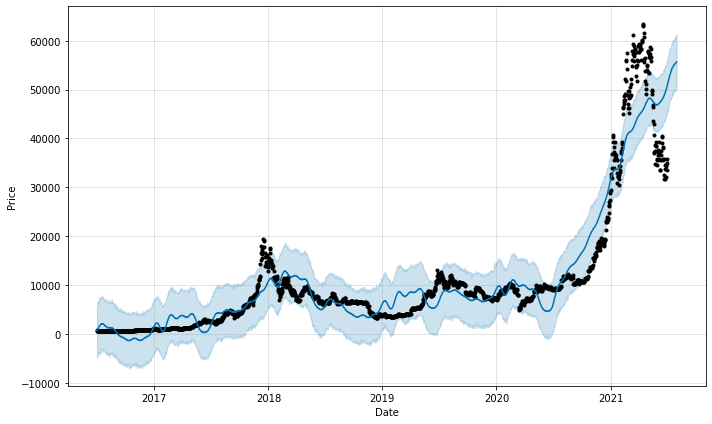

In [ ]:
# Using FBProphet's internal visualization tool to chart
figure =m.plot(forecast, xlabel='Date', ylabel='Price')

The Black dots are the actual closing prices and the blue band is the range predicted by FBProphet

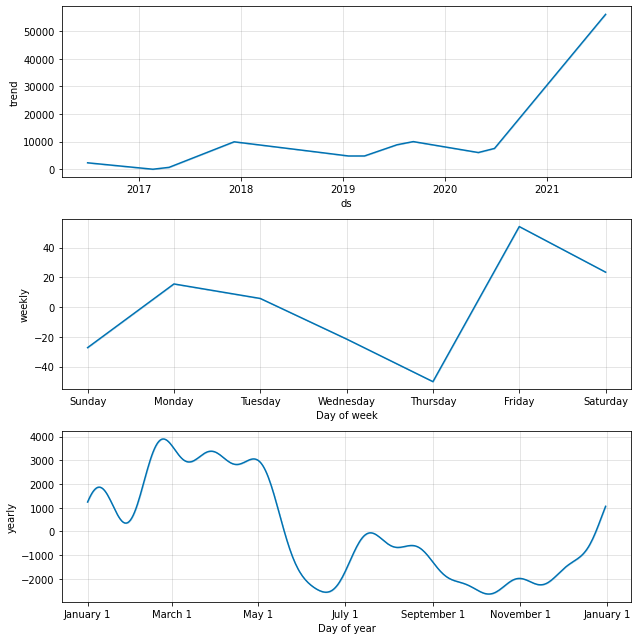

In [ ]:
# Visualising the trend
figure2 = m.plot_components(forecast)

The above figure displays the seasonality of forecast. It can be observed that July to November months have been relatively quiet ones for Bitcoin.
Thursdays have seen the highest jump

##Downloading the Forecast data

In [ ]:
# First the data needs to be converted to a csv file using pandas
forecast.to_csv('BTC_FBP_Forecast.csv')
# Using Google Colab tools to download file
from google.colab import files
files.download('BTC_FBP_Forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Uploading the Evaluation Google Sheets file analysis
from google.colab import files 
files.upload()